# 分析１で年齢を平均で補完したのをやめてみる。

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_csv('data/train.tsv',delimiter='\t')

In [5]:
train.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,456.002247,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,256.703351,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,3.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,227.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,463.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,679.000000,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,888.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [9]:
train2 = train.dropna(subset=['age'])

In [10]:
train2.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,457.230556,0.427778,2.202778,29.211583,0.500000,0.472222,37.505231
std,257.524036,0.495445,0.838152,14.154300,0.867231,0.888995,56.444050
min,3.000000,0.000000,1.000000,0.670000,0.000000,0.000000,5.000000
25%,225.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.662500
50%,458.000000,0.000000,2.000000,28.000000,0.000000,0.000000,17.600000
75%,684.250000,1.000000,3.000000,37.250000,1.000000,1.000000,39.100000
max,884.000000,1.000000,3.000000,80.000000,5.000000,5.000000,512.329200


In [12]:
train2.isnull().sum()

id          0
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [16]:
filled_emb=train2['embarked'].fillna('S')

In [21]:
train3 = pd.concat([train2[['pclass','age','sibsp','parch','fare']],pd.get_dummies(train2['sex']),pd.get_dummies(filled_emb)],axis=1)

In [22]:
train3.head()

,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,1,35.0,1,0,53.1000,1,0,0,0,1
1,3,35.0,0,0,8.0500,0,1,0,0,1
2,3,2.0,3,1,21.0750,0,1,0,0,1
3,2,14.0,1,0,30.0708,1,0,1,0,0
4,1,58.0,0,0,26.5500,1,0,0,0,1


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
y_train = train2['survived']

In [26]:
lr = LogisticRegression()
lr.fit(train3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

モデル作成は以上

### ここから投稿ファイルを作る

In [28]:
test = pd.read_csv("data/test.tsv",delimiter='\t')
X_test=test[['pclass','age','sibsp','parch','fare']]
dsex=pd.get_dummies(test['sex'])
demb=pd.get_dummies(test['embarked'])
X_test=pd.concat([X_test,dsex,demb],axis=1)


In [32]:
X_test.isnull().sum()

pclass     0
age       92
sibsp      0
parch      0
fare       0
female     0
male       0
C          0
Q          0
S          0
dtype: int64

# 360人中92人が年齢不詳　年齢は関係ないのでは？

## 相関を可視化してみることにする

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(train.corr(), annot=True, cmap='plasma', linewidths=.5)

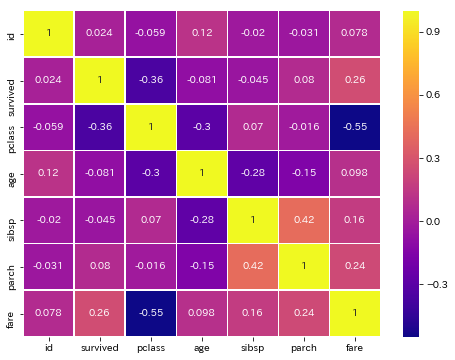

In [35]:
plt.show()

上図だと、pclassとfareの相関が比較的高いことがわかる。embarkedとの相関がわからない。

embarkedをダミー変数化して相関を見てみる。

In [46]:
train2=pd.concat([train['survived'],pd.get_dummies(train['embarked'])],axis=1)

In [47]:
train2.head()

,survived,C,Q,S
0,1,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,1,0,0
4,1,0,0,1


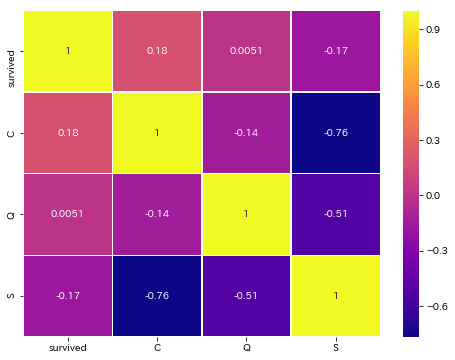

In [49]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(train2.corr(), annot=True, cmap='plasma', linewidths=.5)
plt.show()

## よくわからないのでピボットにしてみることにする。

In [52]:
pd.pivot_table(train,index='survived',columns='embarked')

age                         fare                      \
embarked         C      Q          S          C        Q          S   
survived                                                              
0         33.12500  29.25  29.847701  34.523306  9.30453  22.649781   
1         27.06875  25.00  27.878889  74.978638  9.51615  45.421746   

                  id                             parch                      \
embarked           C           Q           S         C         Q         S   
survived                                                                     
0         391.625000  489.043478  455.729858  0.250000  0.130435  0.421801   
1         488.425532  293.500000  477.543860  0.510638  0.000000  0.596491   

            pclass                       sibsp                      
embarked         C       Q         S         C         Q         S  
survived                                                            
0         2.218750  3.0000  2.540284  0.125000  0.173913  0.706161  
1         1.723404  2.9375  1.894737  0.510638  0.187500  0.517544

In [54]:
pd.pivot_table(train,index='survived',columns='embarked',margins=True)

age                                        fare            \
embarked          C          Q          S        All          C         Q   
survived                                                                    
0         33.125000  29.250000  29.847701  30.206311  34.523306  9.304530   
1         27.068750  25.000000  27.878889  27.589934  74.978638  9.516150   
All       29.339844  27.833333  29.093688  29.095447  67.040433  9.839933   

                                        id                ...        parch  \
embarked          S        All           C           Q    ...            S   
survived                                                  ...                
0         22.649781  24.352729  391.625000  489.043478    ...     0.421801   
1         45.421746  54.771191  488.425532  293.500000    ...     0.596491   
All       31.678072  37.267830  457.265625  397.416667    ...     0.492908   

                      pclass                                   sibsp  \
embarked       All         C         Q         S       All         C   
survived                                                               
0         0.393204  2.218750  3.000000  2.540284  2.490291  0.125000   
1         0.585526  1.723404  2.937500  1.894737  1.828947  0.510638   
All       0.474860  1.812500  2.916667  2.269504  2.209497  0.390625   

                                        
embarked         Q         S       All  
survived                                
0         0.173913  0.706161  0.495146  
1         0.187500  0.517544  0.513158  
All       0.333333  0.535461  0.502793  

[3 rows x 24 columns]

In [55]:
train2.head()

,survived,C,Q,S
0,1,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,1,0,0
4,1,0,0,1


In [63]:
pd.pivot_table(train,index='survived',columns='embarked',aggfunc='count')

age         fare           id          parch ...       pclass      \
embarked   C  Q    S    C   Q    S   C   Q    S     C ...     S      C   Q   
survived                                              ...                    
0         24  8  174   32  23  211  32  23  211    32 ...   211     32  23   
1         40  4  108   47  16  114  47  16  114    47 ...   114     47  16   

              sex          sibsp           
embarked    S   C   Q    S     C   Q    S  
survived                                   
0         211  32  23  211    32  23  211  
1         114  47  16  114    47  16  114  

[2 rows x 21 columns]

In [69]:
train3=pd.concat([train['survived'],train['embarked']],axis=1)

In [70]:
type(train3)

pandas.core.frame.DataFrame

In [72]:
train3.head()

,survived,embarked
0,1,S
1,0,S
2,0,S
3,1,C
4,1,S


In [74]:
pd.pivot_table(train3,index='survived',columns='embarked',aggfunc='count')

survived
0
1


In [75]:
train2.head()

,survived,C,Q,S
0,1,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,1,0,0
4,1,0,0,1


In [78]:
train2['C'].sum()

79

In [79]:
train2['Q'].sum()

39

In [80]:
train2['S'].sum()

325

In [85]:
pd.pivot_table(train3,index='embarked',columns='survived',aggfunc='sum')

embarked


In [83]:
train3.head()

,survived,embarked
0,1,S
1,0,S
2,0,S
3,1,C
4,1,S


In [99]:
((train3['embarked']=='S') & (train3['survived']==1)).sum()/(train3['embarked']=='S') .sum()

0.35076923076923078

↑embarkedがSだと35％の生存率

In [100]:
((train3['embarked']=='Q') & (train3['survived']==1)).sum()/(train3['embarked']=='Q') .sum()

0.41025641025641024

↑Qだと41%の生存率

In [101]:
((train3['embarked']=='C') & (train3['survived']==1)).sum()/(train3['embarked']=='C') .sum()

0.59493670886075944

Cだと５９％の生存率とわかった

In [107]:
pd.pivot_table(train,index='embarked',values='survived',aggfunc='sum')

,survived
embarked,
C,47
Q,16
S,114


In [105]:
pd.pivot_table(train,index='embarked',values='survived',columns='pclass',aggfunc='sum')

pclass,1,2,3
embarked,,,
C,27.0,6.0,14.0
Q,NaN,1.0,15.0
S,45.0,36.0,33.0


In [108]:
pd.pivot_table(train,index='embarked',values='survived',columns='sibsp',aggfunc='sum')

sibsp,0,1,2,3,4,5,8
embarked,,,,,,,
C,25.0,20.0,2.0,NaN,NaN,NaN,NaN
Q,14.0,1.0,1.0,NaN,0.0,NaN,NaN
S,64.0,43.0,5.0,2.0,0.0,0.0,0.0
